In [157]:
from xlrd import open_workbook

book = open_workbook('response_2.xlsx')
sheet = book.sheet_by_index(1)

In [158]:
# read header values into the list    
keys = [sheet.cell(0, col_index).value for col_index in range(sheet.ncols)]

dict_list = []
for row_index in range(1, sheet.nrows):
    d = {keys[col_index]: sheet.cell(row_index, col_index).value 
         for col_index in range(sheet.ncols)}
    dict_list.append(d)

print(dict_list[:1])

[{'bottle': 1.0, 'char_current': '純樸的,有益的,想像力的', 'ID': 1.0, 'hobby': '服務／公益,閱讀／寫作', 'computer': 1.0, 'sex': '男', 'jacket': 0.0, 'education': '碩士', 'cell': 1.0, 'underwear': 0.0, 'income': 1.0, 'brands': 'Uniqlo,Apple,NET,象印', 'shoe': 0.0, 'abroad': 1.0, 'wallet': 0.0, 'profession': '資訊軟體系統類', 'clothing': 1.0, 'bag': 0.0, 'watch': 0.0, 'char_ideal': '有益的,有朝氣的,迷人的'}]


In [159]:
for k, v in dict_list[0].items():
    print(k)

bottle
char_current
ID
hobby
computer
sex
jacket
education
cell
underwear
income
brands
shoe
abroad
wallet
profession
clothing
bag
watch
char_ideal


In [160]:
brand = dict_list[0]['brands'].split(',')
print(brand)

['Uniqlo', 'Apple', 'NET', '象印']


In [200]:
print('Number of records:', len(dict_list))
print('Number of valid records:', len(dict_list)-4)
for item in dict_list:
    print(item['brands'])

Number of records: 106
Number of valid records: 102
['Uniqlo', 'Apple', 'NET', '象印']
['CASIO']
['Nike', 'Mizuno']
['H&M', 'Apple', 'Coach', 'EYESCREAM', 'Fossil', 'GU', 'Longchamp', 'Nike', 'Skechers', 'Uniqlo', '膳魔師']
['acer', 'Asics', 'COWA', 'EASYSHOP', 'Fossil', 'OUTDOORS', 'Puma', 'Sony']
['Mizuno', '象印', 'Converse']
['Uniqlo', 'SST&C', 'CK', 'ZARA', 'MUJI', 'Asus']
['NewBalance', 'HTC', 'Asus', 'Adidas']
['Sony', 'H&M', 'OUTDOORS', 'MUJI', 'COWA', 'Timberlands', '衣芙日系', 'CASIO', 'Apple']
['H&M', 'Skechers', 'EDWIN', 'SunFlower', 'Nike', '50%FIFTYPERCENT']
['NET', 'Apple', 'Baleno', '太和工坊', 'Uniqlo']
['acer']
['Converse', 'CASIO', 'Mizuno']
['Uniqlo', 'Apple', 'NET', '天藍小鋪', '東京著衣']
['Samsung']
['NET', 'NewBalance', 'Lativ', 'Asus', 'Adidas', 'Uniqlo']
['Sony', 'Asus']
['']
['Nike', 'Apple', 'TOMS']
['Asus', 'UA', 'Samsung', 'Nike']
['Nike', 'Apple', 'Adidas']
['acer', 'Uniqlo', 'NewBalance', 'NET', '華歌爾', 'Nike', '東京著衣', 'Apple']
['acer', 'CASIO', 'Coach', 'DKNY', 'Louboutin', 'S

In [66]:
print(dict_list[0])

{'bottle': 1.0, 'char_current': '純樸的,有益的,想像力的', 'ID': 1.0, 'hobby': '服務／公益,閱讀／寫作', 'computer': 1.0, 'sex': '男', 'jacket': 0.0, 'education': '碩士', 'cell': 1.0, 'underwear': 0.0, 'income': 1.0, 'brands': 'Uniqlo,Apple,NET,象印', 'shoe': 0.0, 'abroad': 1.0, 'wallet': 0.0, 'profession': '資訊軟體系統類', 'clothing': 1.0, 'bag': 0.0, 'watch': 0.0, 'char_ideal': '有益的,有朝氣的,迷人的'}


In [166]:
for item in dict_list:
    item['brands'] = item['brands'].split(',')

In [278]:
num_brands = []
for item in dict_list:
    item['brands'] = set(item['brands']) # avoid redundency
    num_brands.append(len(item['brands']))
average = round(sum(num_brands)/len(dict_list),3)
print('Number of total records:', len(dict_list))
print('Average number of brands in each record:', average)

Number of total records: 106
Average number of brands in each record: 5.896


In [277]:
# save brands as excel file
import operator
import xlsxwriter

workbook = xlsxwriter.Workbook('brand.xlsx')
worksheet = workbook.add_worksheet()
for d, item in enumerate(dict_list):
    for i, t in enumerate(item['brands']):
        worksheet.write_string(d, i, t)    
workbook.close()

In [261]:
# count items
from collections import Counter
nbrand = 65 # consider only brands that exist more than twice
all_brands = []
for i in range(len(dict_list)):
    all_brands += dict_list[i]['brands']
all_brands = list(filter(None, all_brands))
c = Counter(all_brands).most_common(nbrand)
print(c)

[('Apple', 53), ('Nike', 51), ('Uniqlo', 36), ('Adidas', 34), ('Asus', 25), ('NET', 20), ('象印', 19), ('H&M', 18), ('ZARA', 18), ('Sony', 15), ('NewBalance', 14), ('HTC', 14), ('Converse', 12), ('CASIO', 9), ('MUJI', 9), ('膳魔師', 9), ('Fossil', 9), ('CK', 8), ('swatch', 8), ('acer', 8), ('Mizuno', 7), ('星巴克', 7), ('曼黛瑪璉', 6), ('Lativ', 5), ('SunFlower', 5), ('50%FIFTYPERCENT', 5), ('MANGO', 5), ('Triumph', 5), ('ROOTS', 5), ('Coach', 4), ('A&F', 4), ('Kswiss', 4), ('SEIKO', 4), ('Queenshop', 4), ('GU', 4), ('Samsung', 4), ('UA', 4), ('GAP', 4), ('Longchamp', 4), ('TOMS', 4), ('華歌爾', 4), ('agnèsb.', 4), ('Porter', 4), ('sloggi', 4), ('Traveler', 3), ('Puma', 3), ('GIORDANO', 3), ('DELL', 3), ('COWA', 3), ('LV', 3), ('Asics', 3), ('EASYSHOP', 3), ('Skechers', 3), ('Superdry', 3), ('Pull&bear', 3), ('Forever21', 2), ('OUTDOORS', 2), ('太和工坊', 2), ('東京著衣', 2), ('TheNorthFace', 2), ('淘寶芒果家', 2), ('Timberland', 2), ('LATIV', 2), ('Baleno', 2), ('EYESCREAM', 2)]


In [262]:
# support for single brand
def support(x):
    nrecords = 102
    return round(x/nrecords, 2)

supp_single = [(tup[0],support(tup[1])) for tup in c]
print("Some example of support for single brand:")
print(supp_single)

Some example of support for single brand:
[('Apple', 0.52), ('Nike', 0.5), ('Uniqlo', 0.35), ('Adidas', 0.33), ('Asus', 0.25), ('NET', 0.2), ('象印', 0.19), ('H&M', 0.18), ('ZARA', 0.18), ('Sony', 0.15), ('NewBalance', 0.14), ('HTC', 0.14), ('Converse', 0.12), ('CASIO', 0.09), ('MUJI', 0.09), ('膳魔師', 0.09), ('Fossil', 0.09), ('CK', 0.08), ('swatch', 0.08), ('acer', 0.08), ('Mizuno', 0.07), ('星巴克', 0.07), ('曼黛瑪璉', 0.06), ('Lativ', 0.05), ('SunFlower', 0.05), ('50%FIFTYPERCENT', 0.05), ('MANGO', 0.05), ('Triumph', 0.05), ('ROOTS', 0.05), ('Coach', 0.04), ('A&F', 0.04), ('Kswiss', 0.04), ('SEIKO', 0.04), ('Queenshop', 0.04), ('GU', 0.04), ('Samsung', 0.04), ('UA', 0.04), ('GAP', 0.04), ('Longchamp', 0.04), ('TOMS', 0.04), ('華歌爾', 0.04), ('agnèsb.', 0.04), ('Porter', 0.04), ('sloggi', 0.04), ('Traveler', 0.03), ('Puma', 0.03), ('GIORDANO', 0.03), ('DELL', 0.03), ('COWA', 0.03), ('LV', 0.03), ('Asics', 0.03), ('EASYSHOP', 0.03), ('Skechers', 0.03), ('Superdry', 0.03), ('Pull&bear', 0.03), ('F

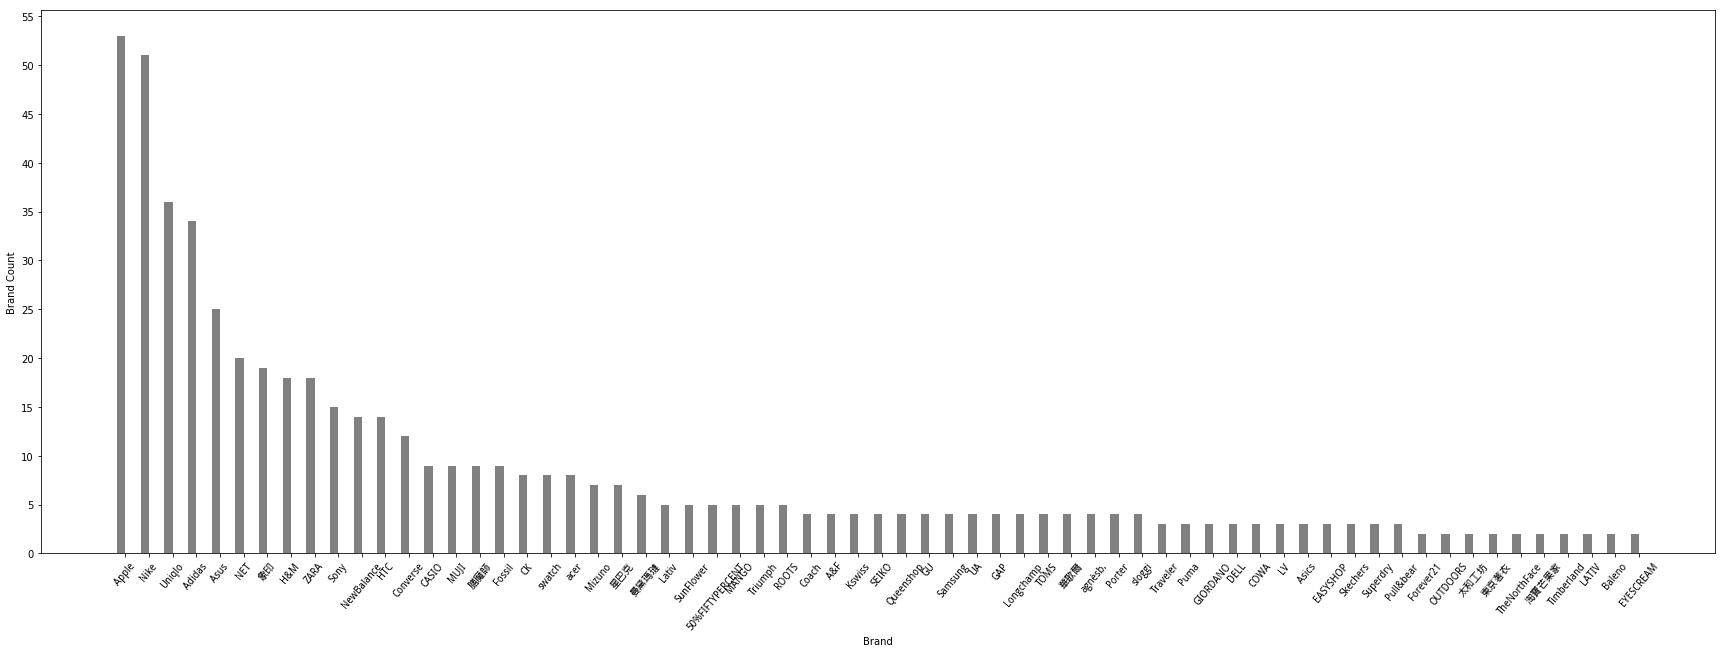

In [263]:
# brand frequency
import numpy as np
brand_count = []
brand_label = []
for item in c:
        brand_count.append(item[1])
        brand_label.append(item[0])
ind = np.arange(nbrand)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.figure(figsize = (30,10))
plt.bar(ind, brand_count, width, color="gray")
plt.xticks(ind + width, brand_label, rotation = 50, fontproperties = WQY)
plt.yticks(np.arange(0, 56, 5))
plt.xlabel("Brand")
plt.ylabel("Brand Count")
plt.savefig('brand_count.png', dpi=100)
plt.show()

In [264]:
# list all brand pairs
import itertools
result = []
for item in dict_list:
    result.extend(list(itertools.combinations(item['brands'], 2)))
print(result[:20])

[('Apple', 'NET'), ('Apple', '象印'), ('Apple', 'Uniqlo'), ('NET', '象印'), ('NET', 'Uniqlo'), ('象印', 'Uniqlo'), ('Nike', 'Mizuno'), ('Apple', 'EYESCREAM'), ('Apple', 'Fossil'), ('Apple', 'Coach'), ('Apple', 'GU'), ('Apple', 'Nike'), ('Apple', 'Skechers'), ('Apple', 'H&M'), ('Apple', '膳魔師'), ('Apple', 'Longchamp'), ('Apple', 'Uniqlo'), ('EYESCREAM', 'Fossil'), ('EYESCREAM', 'Coach'), ('EYESCREAM', 'GU')]


In [267]:
# list ID and its brand pairs
import itertools
result = []
for item in dict_list:
    result.append([round(item['ID']),list(itertools.combinations(item['brands'], 2))])
print(result[:1])

[[1, [('Apple', 'NET'), ('Apple', '象印'), ('Apple', 'Uniqlo'), ('NET', '象印'), ('NET', 'Uniqlo'), ('象印', 'Uniqlo')]]]


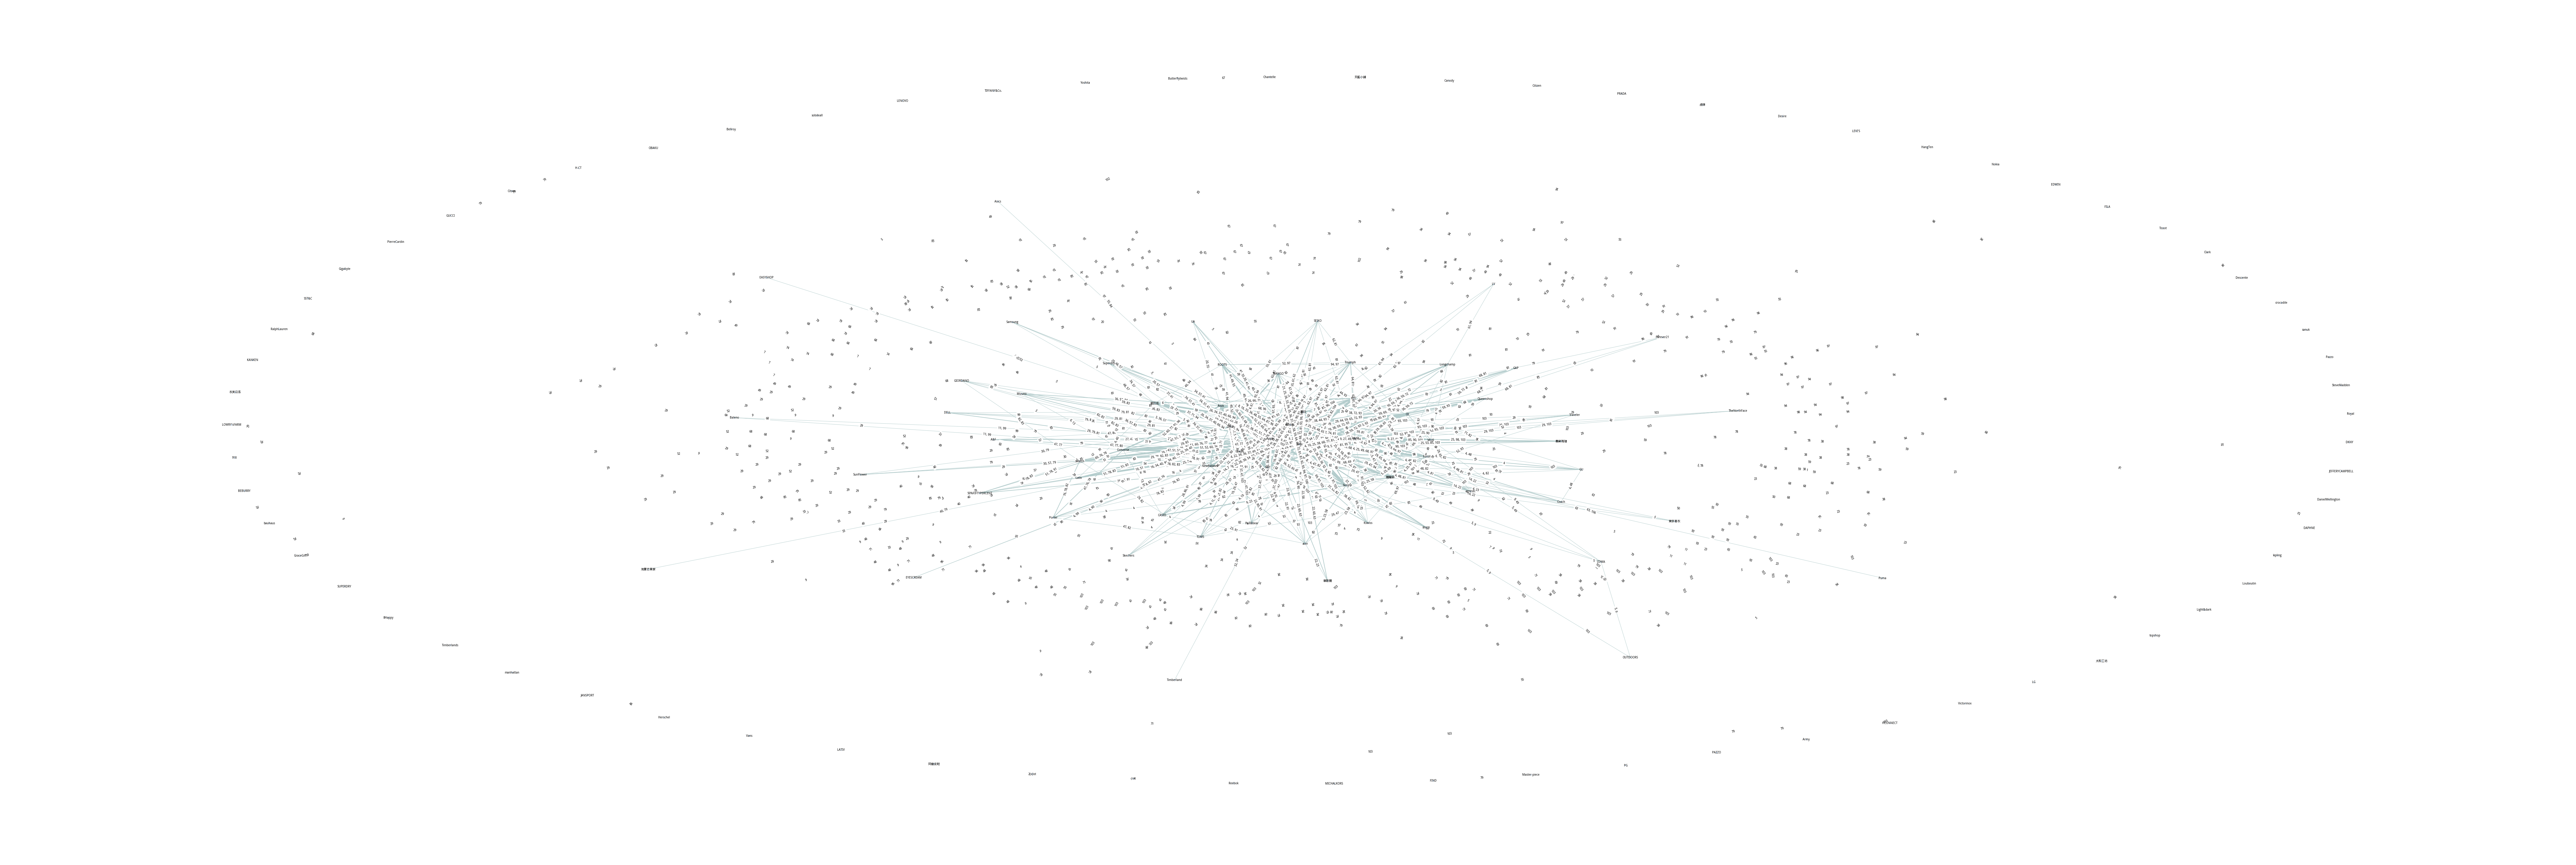

In [268]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

nx.set_fontproperties(WQY)

default_weight = 1
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for item in result:
    for nodes in item[1]:
        n0 = nodes[0]
        n1 = nodes[1]
        if G.has_edge(n0,n1):   
            G[n0][n1]['weight'] += default_weight
            G[n0][n1]['id'] += ', '+str(round(item[0]))
        else:
            G.add_edge(n0,n1, weight = 0)
            G[n0][n1]['id'] = str(round(item[0])) 

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G)

nx.draw(G, pos, node_color = BLUE, with_labels = True, width = weights, edge_color = GRAY, node_size = 8)
edge_labels = nx.get_edge_attributes(G,'id')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
fig = plt.gcf()
fig.set_size_inches(120, 40)
fig.savefig('brand_nw_nolabel.png', dpi=100)

In [269]:
# print some edges in the network
G.edges()[:5]

[('MICHALKORS', 'Adidas'),
 ('MICHALKORS', 'Apple'),
 ('MICHALKORS', 'agnèsb.'),
 ('MICHALKORS', 'LV'),
 ('MICHALKORS', '星巴克')]

In [270]:
import operator

edge_labels = nx.get_edge_attributes(G, 'weight')
sorted_edge = sorted(edge_labels.items(), key=operator.itemgetter(1), reverse = True)

print('Some examples of sorted pairs:')
print(sorted_edge[:10])

Some examples of sorted pairs:
[(('Nike', 'Apple'), 29), (('Uniqlo', 'Apple'), 21), (('Adidas', 'Nike'), 20), (('Adidas', 'Apple'), 18), (('Uniqlo', 'Nike'), 16), (('Uniqlo', 'Adidas'), 13), (('Uniqlo', 'NET'), 12), (('H&M', 'Apple'), 11), (('Apple', 'NET'), 11), (('ZARA', 'Apple'), 11)]


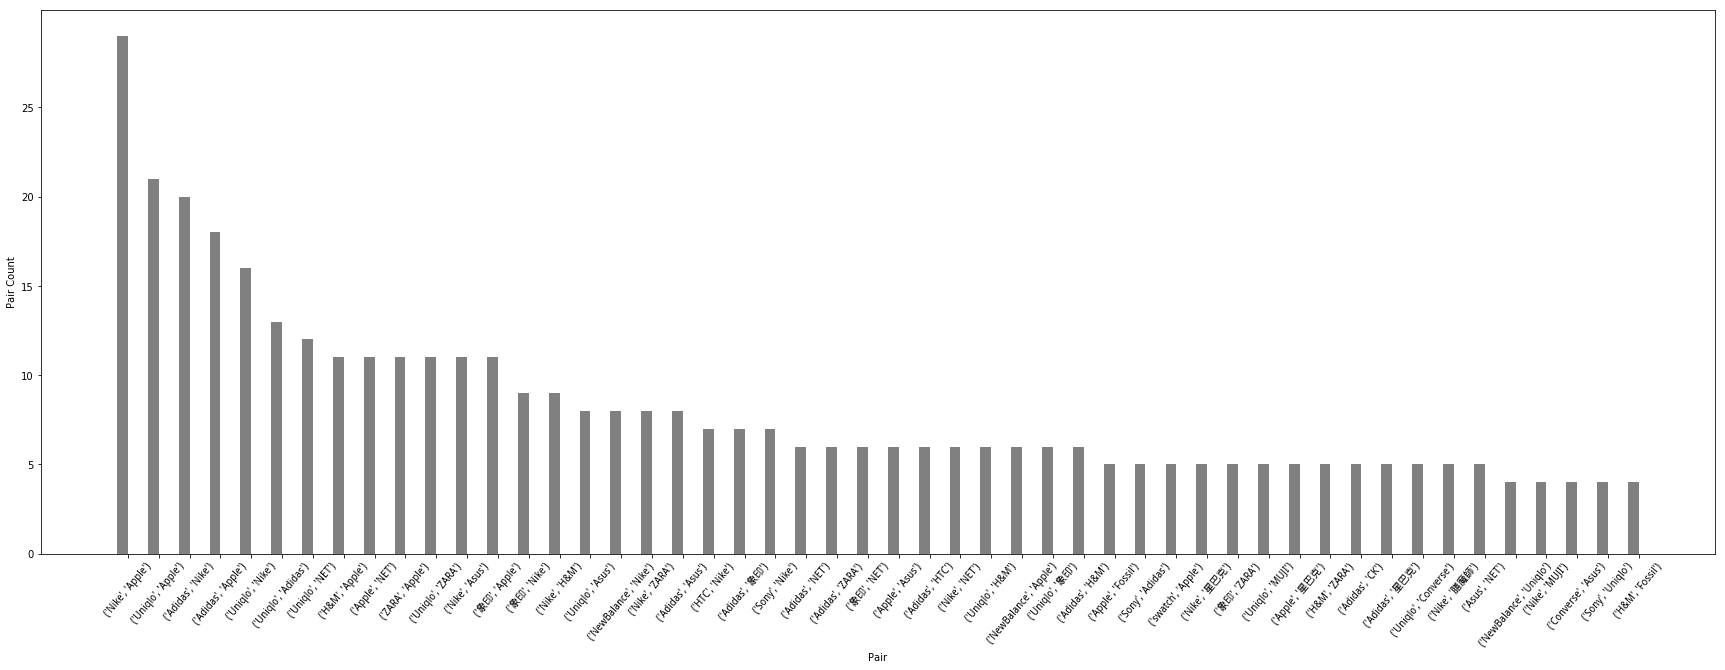

In [271]:
# pair frequency
npair = 50 # Show the top npair in the graph
pair_count = []
pair_label = []
for item in sorted_edge[:npair]:
        pair_count.append(item[1])
        pair_label.append(item[0])
ind = np.arange(npair)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.figure(figsize = (30,10))
plt.bar(ind, pair_count, width, color="gray")
plt.xticks(ind + width, pair_label, rotation = 50, fontproperties = WQY)
plt.yticks(np.arange(0, 30, 5))
plt.xlabel("Pair")
plt.ylabel("Pair Count")
plt.savefig('pair_count.png', dpi=100)
plt.show()

In [272]:
# support for pairs
supp_pairt = [(pair[0], support(pair[1])) for pair in sorted_edge]
print('Some examples of support for pairs:')
print(supp_pairt[:10])

Some examples of support for pairs:
[(('Nike', 'Apple'), 0.28), (('Uniqlo', 'Apple'), 0.21), (('Adidas', 'Nike'), 0.2), (('Adidas', 'Apple'), 0.18), (('Uniqlo', 'Nike'), 0.16), (('Uniqlo', 'Adidas'), 0.13), (('Uniqlo', 'NET'), 0.12), (('H&M', 'Apple'), 0.11), (('Apple', 'NET'), 0.11), (('ZARA', 'Apple'), 0.11)]


In [273]:
a = G['Apple']['Adidas']['id'].split(", ")
b = G['Nike']['H&M']['id'].split(", ")
c = [val for val in a if val in b]
print('intersection:',c)

intersection: ['94', '97']


In [274]:
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])

Degree: [('Apple', 102), ('Uniqlo', 93), ('Nike', 91), ('Adidas', 80), ('H&M', 73), ('ZARA', 69), ('NET', 60), ('象印', 59), ('Asus', 58), ('Sony', 50), ('Fossil', 50), ('Converse', 48), ('膳魔師', 42), ('MUJI', 41), ('HTC', 39)]

Closeness centrality: [('Apple', 0.8109756097560976), ('Uniqlo', 0.7687861271676301), ('Nike', 0.76), ('Adidas', 0.7150537634408602), ('H&M', 0.689119170984456), ('ZARA', 0.6751269035532995), ('NET', 0.6456310679611651), ('象印', 0.642512077294686), ('Asus', 0.6394230769230769), ('Sony', 0.6157407407407407), ('Fossil', 0.6157407407407407), ('Converse', 0.6100917431192661), ('膳魔師', 0.59375), ('MUJI', 0.5911111111111111), ('HTC', 0.5859030837004405)]

Degree centrality: [('Apple', 0.7669172932330827), ('Uniqlo', 0.6992481203007519), ('Nike', 0.6842105263157894), ('Adidas', 0.6015037593984962), ('H&M', 0.5488721804511278), ('ZARA', 0.518796992481203), ('NET', 0.45112781954887216), ('象印', 0.44360902255639095), ('Asus', 0.43609022556390975), ('Sony', 0.37593984962406013)